#   File: DSC540 Curry acurry DSC540 Term Project.py
#   Name: Adam Curry
#   Date: 02/22/2020
#   Course: DSC540 - Data Preperation
#   Desc: This program pings Spotify's API to produce a dataset on a single user's playlsits
#   Usage: This program should be used when reviewing the final term project

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
# Ger the username from https://open.spotify.com/user/1227414957?si=OQ1YwCARR52vr6fCCsG0HQ
username = "1227414957"

# create a spotify object with the connection
# Spotify credentials are stored lochally but called through the SpotifyClientCredentials module
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

"""
Get the user's total playlist population
"""
playlists = spotify.user_playlists(username)

playlist_tracks = []

"""
for loop to appendeach playlist to a list object
"""
for playlist in playlists['items']:
    playlist_tracks.append(spotify.user_playlist_tracks
                           (username,playlist_id=playlist['uri']))

playlist_data = []
"""
For loop will append each track from a user's total public playlists to a dict
"""
for plist in playlist_tracks:
    try:
        for i in plist['items']:
            # create a dict to store the data, start with none type and append accordingly
            plist_dict = {
            'playlist_track_name' : None,
            'playlist_album_name' : None,
            'playlist_album_uri' : None,
            'playlist_track_popularity' : None,
            'playlist_track_duration' : None,
            'track_uri' : None,
            'playlist_artist_name' : None,
            'playlist_artist_uri' : None
            }
            try:
                plist_dict['playlist_track_name'] = (i['track']['name'])#track name
                plist_dict['playlist_album_name'] = (i['track']['album']['name'])#album name
                plist_dict['playlist_album_uri'] = (i['track']['album']['uri'])
                plist_dict['playlist_track_popularity'] = (i['track']['popularity'])
                plist_dict['playlist_track_duration'] = (i['track']['duration_ms'])
                plist_dict['track_uri'] = (i['track']['uri'])
                plist_dict['playlist_artist_name'] = (i['track']['artists'][0]['name'])
                plist_dict['playlist_artist_uri'] = (i['track']['artists'][0]['uri'])
                playlist_data.append(plist_dict)
            except Exception as ee:
                print(ee)+'inner'
                continue
    except Exception as e:
        print(e)
        continue


In [3]:
"""
from the population of the playlist tracks, get the track featers from spotify
The code takes several seconds.
"""
audio_features_ = []
for track in playlist_data:
    audio_features_.append(spotify.audio_features(track['track_uri']))

retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...3secs
retrying ...4secs


In [4]:
"""
For loop will append each track's audio features to a dict
"""
track_data = []
for i, t in enumerate(audio_features_):
    track_dict = {
        'track_uri' : None,
        'acousticness' : None,
        'danceability' : None,
        'energy' : None,
        'instrumentalness' : None,
        'key' : None,
        'liveness' : None,
        'loudness' : None,
        'speechiness' : None,
        'tempo' : None,
        'time_signature' : None,
        'valence' : None
        }
    try:
        track_dict['track_uri'] = (t[0]['uri'])
        track_dict['acousticness'] = (t[0]['acousticness'])
        track_dict['danceability'] = (t[0]['danceability'])
        track_dict['energy'] = (t[0]['energy'])
        track_dict['instrumentalness'] = (t[0]['instrumentalness'])
        track_dict['key'] = (t[0]['key'])
        track_dict['liveness'] = (t[0]['liveness'])
        track_dict['loudness'] = (t[0]['loudness'])
        track_dict['speechiness'] = (t[0]['speechiness'])
        track_dict['tempo'] = (t[0]['tempo'])
        track_dict['time_signature'] = (t[0]['time_signature'])
        track_dict['valence'] = (t[0]['valence'])
        track_data.append(track_dict)
    except Exception:
        pass  

In [5]:
# load the dictionaries to dataframes
df_track_data = pd.DataFrame(track_data)
df_playlist_data = pd.DataFrame(playlist_data)

In [25]:
import datetime
# update the duration_ms to MM:SS
df_playlist_data['track_MMSS'] = pd.to_datetime(df_playlist_data["playlist_track_duration"],
                                                unit='ms').dt.strftime("%H:%M:%S")

In [27]:
# merge for a final dataset
df_final = df_track_data.merge(df_playlist_data,how='inner',on='track_uri')

df_final.head(5)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,track_uri,valence,playlist_album_name,playlist_album_uri,playlist_artist_name,playlist_artist_uri,playlist_track_duration,playlist_track_name,playlist_track_popularity,track_MMSS
0,0.000853,0.405,0.971,0.000005,2,0.3320,-4.422,0.0461,96.030,4,spotify:track:6AEUMCqOmqjSNLeKPJZIca,0.4640,Legacy,spotify:album:7ocvxAkixEXHnmw88mhBjH,Myrath,spotify:artist:72500XOYPw5e7OgFWuW2Gl,272477,Believer,33,00:04:32
1,0.011800,0.524,0.848,0.003990,5,0.2340,-4.483,0.0329,129.984,3,spotify:track:0OXuh7SounkVkS5CyOytk7,0.2570,Isolated Chapters,spotify:album:3QwmXpJGN9i7awAT9nKrKT,Circus Maximus,spotify:artist:1pxKRI6EFLtWmAiya9Pj1S,458354,Endgame,27,00:07:38
2,0.000004,0.367,0.944,0.000730,7,0.2080,-7.929,0.0809,194.940,4,spotify:track:0KpJzVYObU6DWxN7vOspy8,0.0983,Apex,spotify:album:5JybNeeVC1mXYcJtiLGOhq,Unleash The Archers,spotify:artist:6irKXFXk2sPNmHtKqmrfuU,305746,The Coward's Way,30,00:05:05
3,0.001420,0.302,0.839,0.000000,4,0.1820,-9.004,0.1340,160.013,4,spotify:track:2Tf8pG0gKmDNadeg6n2ZZY,0.3250,Northwest Passage,spotify:album:1JDh8UfPZOXWrmyHaMtFSA,Unleash The Archers,spotify:artist:6irKXFXk2sPNmHtKqmrfuU,275648,Northwest Passage,43,00:04:35
4,0.000006,0.395,0.980,0.000481,6,0.0912,-8.533,0.0941,155.046,4,spotify:track:2SSjG3f820oZL5zd43RzTi,0.1750,Apex,spotify:album:5JybNeeVC1mXYcJtiLGOhq,Unleash The Archers,spotify:artist:6irKXFXk2sPNmHtKqmrfuU,437920,Awakening,41,00:07:17


In [63]:
# remove live tracks from the dataset .8 is a high liklihood of a live track
df_final = df_final.where(df_final['liveness']<.8).dropna()
# Values above 0.66 describe tracks that are probably made entirely of spoken words.
df_final = df_final.where(df_final['speechiness']<.66).dropna()
# remove values that have no tempo, as these could be interludes or fillers
df_final = df_final.where(df_final['tempo']>0).dropna()

# remove songs that are shorter than 2 minutes
df_final = df_final.where(df_final['playlist_track_duration']>120000).dropna()

# show the top 5 songs with the most energy
print(df_final.sort_values("energy", ascending=False).head(5))
print('\n\n')
# show the top 5 songs with the most danceability
print(df_final.sort_values("danceability", ascending=False).head(5))

     acousticness  danceability  energy  instrumentalness   key  liveness  \
31       0.000052         0.437   0.997          0.742000  11.0    0.1460   
33       0.000156         0.412   0.997          0.927000   9.0    0.0819   
441      0.000037         0.499   0.996          0.000971   7.0    0.2450   
442      0.000033         0.518   0.996          0.001900  11.0    0.3890   
439      0.000003         0.322   0.996          0.003180   4.0    0.0672   

     loudness  speechiness    tempo  time_signature  \
31     -3.008        0.167  144.982             4.0   
33     -3.086        0.116  158.976             4.0   
441    -3.330        0.139  105.030             4.0   
442    -3.484        0.187  112.529             3.0   
439    -2.990        0.203  115.514             3.0   

                                track_uri  valence   playlist_album_name  \
31   spotify:track:40EzXm2yh8EHSfiaHgTupI   0.0576             Apoptosis   
33   spotify:track:3dbaNuRPB2przIawerko0O   0.2680    

### Exploratory Data Analysis (EDA)

In [61]:
import matplotlib.pyplot as plt

0    0.343
dtype: float64
-0.29750595563554416
0.5381788635285868
count    485.000000
mean       0.305093
std        0.169315
min        0.035900
25%        0.170000
50%        0.290000
75%        0.410000
max        0.881000
Name: valence, dtype: float64
0    0.437
dtype: float64
0.7178297396101416
-0.44368523615636474
count    485.000000
mean       0.412816
std        0.101000
min        0.063000
25%        0.347000
50%        0.428000
75%        0.486000
max        0.870000
Name: danceability, dtype: float64


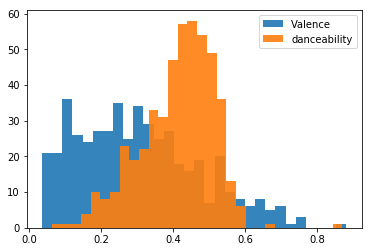

In [65]:
def histFunc (var, name, b):
    Hist = var.dropna()
    plt.hist(Hist, bins=b, alpha=.9, label=name)
    plt.legend()
    print(Hist.mode())
    print(Hist.kurtosis())
    print(Hist.skew())
    print(Hist.describe())

# this shows the positiveness and how easily one can dance to the music in my playlsits
histvalence = histFunc(df_final['valence'],'Valence',30)
histdanceability = histFunc(df_final['danceability'],'danceability',30)

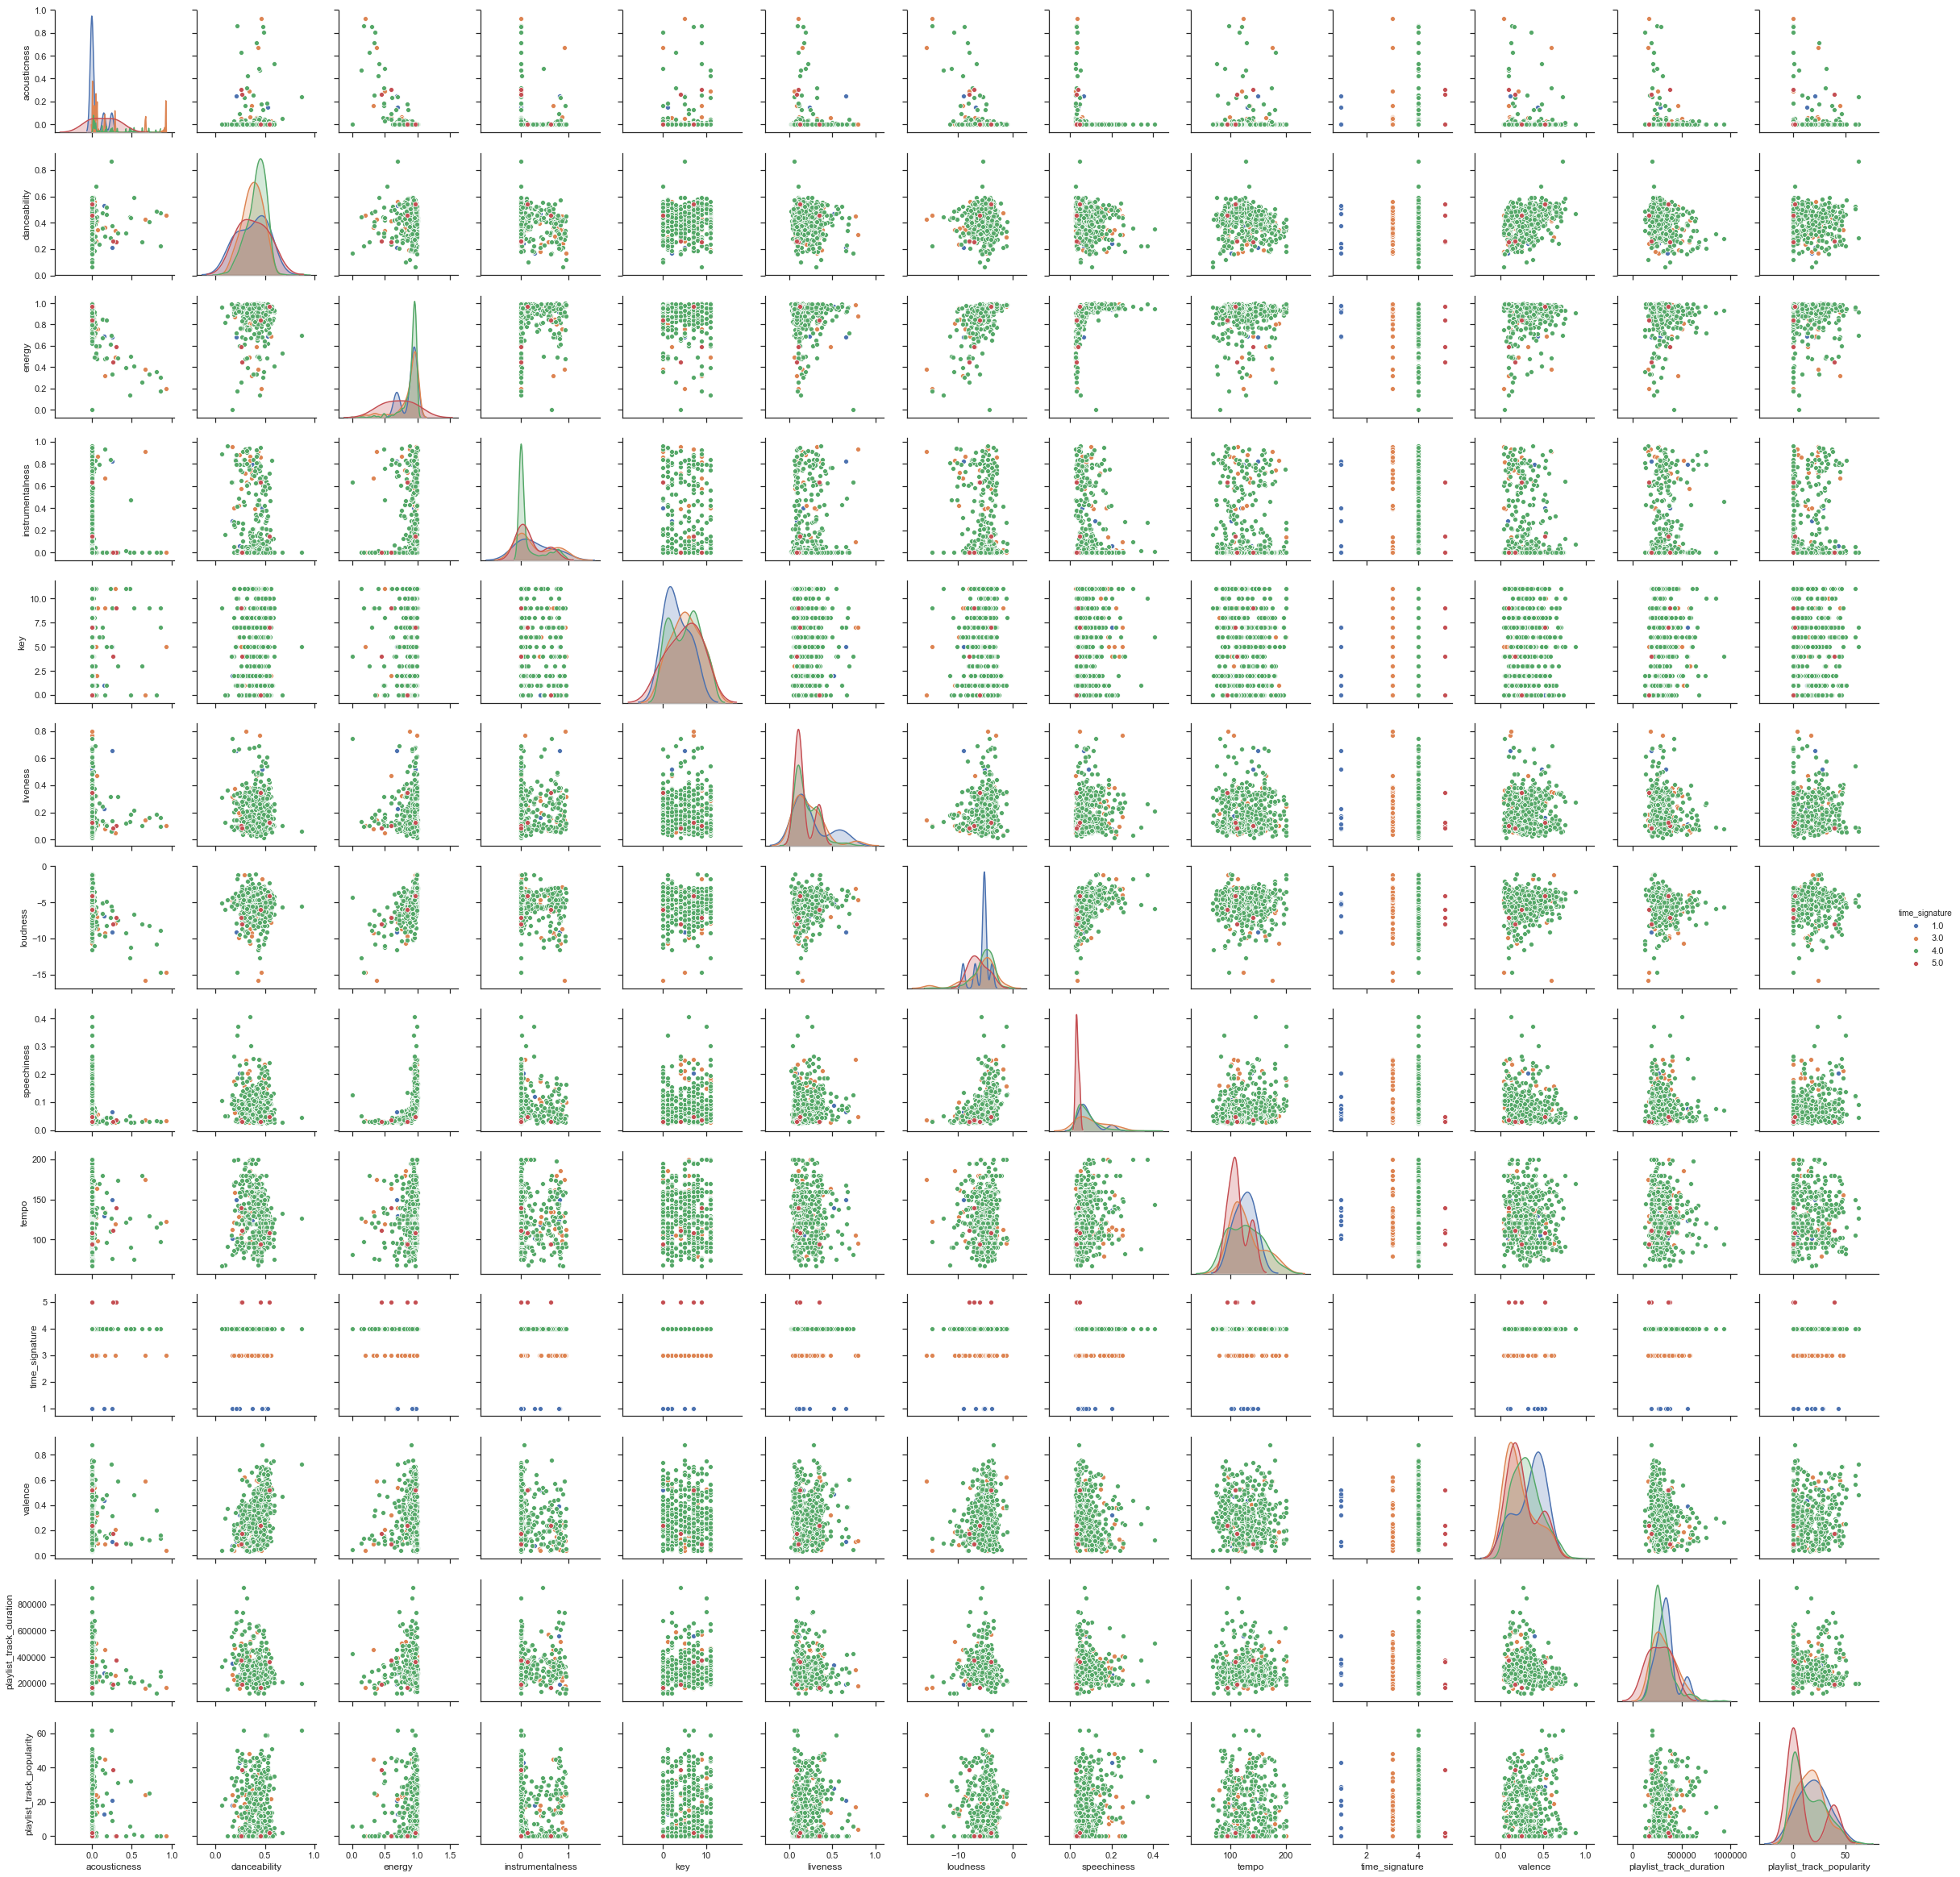

In [70]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df_final, hue="time_signature")